In [0]:
# # # #unzip data
# !unzip test.zip
# !unzip train.zip

In [0]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression

In [0]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [0]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
# for i in df_train[]:
#   print("unique values in: ",df_train['i'],":",df_train[i].unique())
cols=list(df_train)
cols

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [0]:
#Unique entries in every coloumns
for i in cols:
  print(i,df_train[i].unique())

User_ID [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender ['F' 'M']
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category ['A' 'C' 'B']
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']
Marital_Status [0 1]
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase [ 8370 15200  1422 ...   135   123   613]


In [0]:
#Number of Unique entries
for i in cols:
  print(i,":",df_train[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 18105


In [0]:
# 1. Which product category and store had the highest sales?
#sort data acc to cities
citya=df_train[df_train['City_Category']=='A']
cityb=df_train[df_train['City_Category']=='B']
cityc=df_train[df_train['City_Category']=='C']

In [0]:
cityc.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614


In [0]:
pura=citya['Purchase'].sum()
purb=cityb['Purchase'].sum()
purc=cityc['Purchase'].sum()
print("Purchase in City A Stores:",pura)
print("Purchase in City B Stores:",purb)
print("Purchase in City C Stores:",purc)

Purchase in City A Stores: 1316471661
Purchase in City B Stores: 2115533605
Purchase in City C Stores: 1663807476


In [0]:
#CITY A ANALYSIS
prod1=citya.filter(['Product_Category_1'],axis=1)
prod2=citya.filter(['Product_Category_2'],axis=1)
prod3=citya.filter(['Product_Category_3'],axis=1)
# new = old.filter(['A','B','D'], axis=1)
prod2.dropna(inplace=True)
prod3.dropna(inplace=True)

In [0]:
#Clean Data
df_train['Product_Category_2'].fillna(-1,inplace=True)
df_train['Product_Category_3'].fillna(-1,inplace=True)
df_train['Product_Category_2']=df_train['Product_Category_2'].astype('int64')
df_train['Product_Category_1']=df_train['Product_Category_1'].astype('int64')
df_train['Product_Category_3']=df_train['Product_Category_3'].astype('int64')
# df_train.head()
df_train['Product_Category_2'].dtype

dtype('int64')

In [0]:
prod2['Product_Category_2']=prod2['Product_Category_2'].astype('int64')
prod3['Product_Category_3']=prod3['Product_Category_3'].astype('int64')
# df_train['Product_Category_3']=df_train['Product_Category_3'].astype('int64')

In [0]:
# Number of Products bought according to the data
nprod1=len(prod1.index)
nprod2=len(prod2.index)
nprod3=len(prod3.index)
total=nprod1+nprod2+nprod3

In [0]:
# Data for Visualization
plotdata=[nprod1,nprod2,nprod3]
# plotdata=pd.DataFrame(plotdata)
# plotdata=plotdata.transpose()
# plotdata.set_index(1)

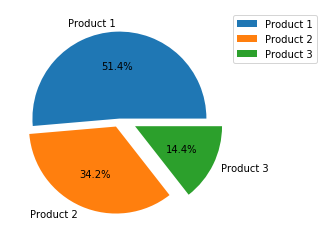

In [0]:
#Pie Chart
plt.pie(plotdata,labels=['Product 1','Product 2','Product 3'],explode = (0, 0.1, 0.2,),autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1,1))

In [0]:
#CITY B ANALYSIS
produ1=cityb.filter(['Product_Category_1'],axis=1)
produ2=cityb.filter(['Product_Category_2'],axis=1)
produ3=cityb.filter(['Product_Category_3'],axis=1)
# new = old.filter(['A','B','D'], axis=1)
produ2.dropna(inplace=True)
produ3.dropna(inplace=True)

In [0]:
produ2['Product_Category_2']=produ2['Product_Category_2'].astype('int64')
produ3['Product_Category_3']=produ3['Product_Category_3'].astype('int64')
# df_train['Product_Category_3']=df_train['Product_Category_3'].astype('int64')

In [0]:
# Number of Products bought according to the data
nprodu1=len(produ1.index)
nprodu2=len(produ2.index)
nprodu3=len(produ3.index)
total=nprodu1+nprodu2+nprodu3

In [0]:
# Data for Visualization
plotdatau=[nprodu1,nprodu2,nprodu3]
# plotdata=pd.DataFrame(plotdata)
# plotdata=plotdata.transpose()
# plotdata.set_index(1)

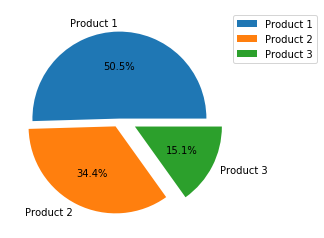

In [0]:
#Pie Chart
plt.pie(plotdatau,labels=['Product 1','Product 2','Product 3'],explode = (0, 0.1, 0.2,),autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1,1))

In [0]:
#CITY C ANALYSIS
produc1=cityc.filter(['Product_Category_1'],axis=1)
produc2=cityc.filter(['Product_Category_2'],axis=1)
produc3=cityc.filter(['Product_Category_3'],axis=1)
# new = old.filter(['A','B','D'], axis=1)
produc2.dropna(inplace=True)
produc3.dropna(inplace=True)

In [0]:
produc2['Product_Category_2']=produc2['Product_Category_2'].astype('int64')
produc3['Product_Category_3']=produc3['Product_Category_3'].astype('int64')
# df_train['Product_Category_3']=df_train['Product_Category_3'].astype('int64')

In [0]:
# Number of Products bought according to the data
nproduc1=len(produc1.index)
nproduc2=len(produc2.index)
nproduc3=len(produc3.index)
total=nproduc1+nproduc2+nproduc3

In [0]:
# Data for Visualization
plotdatauc=[nproduc1,nproduc2,nproduc3]
# plotdata=pd.DataFrame(plotdata)
# plotdata=plotdata.transpose()
# plotdata.set_index(1)

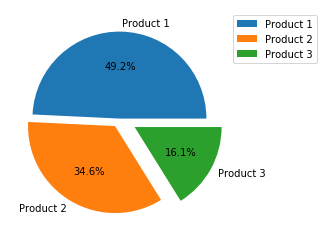

In [0]:
#Pie Chart
plt.pie(plotdatauc,labels=['Product 1','Product 2','Product 3'],explode = (0, 0.1, 0.2,),autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1,1))

In [0]:
print("--------------------------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------------------------


In [0]:
print("Number of unique customers in city A:")
print(citya[['User_ID']].nunique())
print("Number of unique customers in city B:")
print(cityb[['User_ID']].nunique())
print("Number of unique customers in city C:")
print(cityc[['User_ID']].nunique())

Number of unique customers in city A:
User_ID    1045
dtype: int64
Number of unique customers in city B:
User_ID    1707
dtype: int64
Number of unique customers in city C:
User_ID    3139
dtype: int64


In [0]:
# 2. What products usually buy families and single people?

In [0]:
mar_count=df_train[df_train['Marital_Status']==1].count()[0]         #Marriedcount
unmar_count=df_train[df_train['Marital_Status']==0].count()[0]       #UnmarriedCount
male=df_train[df_train['Gender']=='M'].count()[0]                    #MaleCount
female=df_train[df_train['Gender']=='F'].count()[0]                  #FemaleCount

In [0]:
prod1=df_train['Product_Category_1'].unique()
prod1.sort()
prod1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [0]:
prod2=df_train['Product_Category_2'].unique()
prod2.sort()
prod2=np.delete(prod2,0)

In [0]:
prod2

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [0]:
prod3=df_train['Product_Category_3'].unique()
prod3.sort()
prod3=np.delete(prod3,0)

In [0]:
prod3

array([ 3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [0]:
marrprod=df_train[df_train['Marital_Status']==1]
notmarrprod=df_train[df_train['Marital_Status']==0]

In [0]:
####################PRODUCT 1 FOR MARRIED COUPLES ########################################
prod=0
max_c=0
for i in prod1:
  b=marrprod[marrprod['Product_Category_1']==i]
  count=len(b.index)
  print(i," has been brought ",count," times")
  if(max_c<count):
    max_c=count
    prod=i
    
  
print("___________________________________________________________________________________")
print("Married couples bought product",prod,"maximum times")
print("___________________________________________________________________________________")

1  has been brought  56003  times
2  has been brought  9726  times
3  has been brought  7854  times
4  has been brought  4576  times
5  has been brought  61277  times
6  has been brought  8327  times
7  has been brought  1681  times
8  has been brought  48514  times
9  has been brought  163  times
10  has been brought  2347  times
11  has been brought  9619  times
12  has been brought  1913  times
13  has been brought  2387  times
14  has been brought  677  times
15  has been brought  2667  times
16  has been brought  4115  times
17  has been brought  280  times
18  has been brought  1484  times
19  has been brought  657  times
20  has been brought  1070  times
___________________________________________________________________________________
Married couples bought product 5 maximum times
___________________________________________________________________________________


In [0]:
####################PRODUCT 1 FOR UNMARRIED COUPLES ########################################
prod=0
max_c=0
for i in prod1:
  b=notmarrprod[notmarrprod['Product_Category_1']==i]
  count=len(b.index)
  print(i," has been brought ",count," times")
  if(max_c<count):
    max_c=count
    prod=i
    
  
print("___________________________________________________________________________________")
print("Not Married couples bought product",prod,"maximum times")
print("___________________________________________________________________________________")

1  has been brought  84375  times
2  has been brought  14138  times
3  has been brought  12359  times
4  has been brought  7177  times
5  has been brought  89656  times
6  has been brought  12139  times
7  has been brought  2040  times
8  has been brought  65411  times
9  has been brought  247  times
10  has been brought  2778  times
11  has been brought  14668  times
12  has been brought  2034  times
13  has been brought  3162  times
14  has been brought  846  times
15  has been brought  3623  times
16  has been brought  5713  times
17  has been brought  298  times
18  has been brought  1641  times
19  has been brought  946  times
20  has been brought  1480  times
___________________________________________________________________________________
Not Married couples bought product 5 maximum times
___________________________________________________________________________________


In [0]:
####################PRODUCT 2 FOR MARRIED COUPLES ########################################
prod=0
max_c=0
for i in prod2:
  b=marrprod[marrprod['Product_Category_2']==i]
  count=len(b.index)
  print(i," has been brought ",count," times")
  if(max_c<count):
    max_c=count
    prod=i
    
  
print("___________________________________________________________________________________")
print("Married couples bought product",prod,"maximum times")
print("___________________________________________________________________________________")

2  has been brought  19345  times
3  has been brought  1083  times
4  has been brought  9865  times
5  has been brought  10332  times
6  has been brought  6662  times
7  has been brought  257  times
8  has been brought  26734  times
9  has been brought  2270  times
10  has been brought  1396  times
11  has been brought  5532  times
12  has been brought  2408  times
13  has been brought  4555  times
14  has been brought  22717  times
15  has been brought  15439  times
16  has been brought  17341  times
17  has been brought  5741  times
18  has been brought  1270  times
___________________________________________________________________________________
Married couples bought product 8 maximum times
___________________________________________________________________________________


In [0]:
####################PRODUCT 2 FOR UNMARRIED COUPLES ########################################
prod=0
max_c=0
for i in prod2:
  b=notmarrprod[notmarrprod['Product_Category_2']==i]
  count=len(b.index)
  print(i," has been brought ",count," times")
  if(max_c<count):
    max_c=count
    prod=i
    
  
print("___________________________________________________________________________________")
print("Not Married couples bought product",prod,"maximum times")
print("___________________________________________________________________________________")

2  has been brought  29872  times
3  has been brought  1801  times
4  has been brought  15812  times
5  has been brought  15903  times
6  has been brought  9804  times
7  has been brought  369  times
8  has been brought  37354  times
9  has been brought  3423  times
10  has been brought  1647  times
11  has been brought  8602  times
12  has been brought  3120  times
13  has been brought  5976  times
14  has been brought  32391  times
15  has been brought  22416  times
16  has been brought  25914  times
17  has been brought  7579  times
18  has been brought  1500  times
___________________________________________________________________________________
Not Married couples bought product 8 maximum times
___________________________________________________________________________________


In [0]:
####################PRODUCT 3 FOR MARRIED COUPLES ########################################
prod=0
max_c=0
for i in prod3:
  b=marrprod[marrprod['Product_Category_3']==i]
  count=len(b.index)
  print(i," has been brought ",count," times")
  if(max_c<count):
    max_c=count
    prod=i
    
  
print("___________________________________________________________________________________")
print("Married couples bought product",prod,"maximum times")
print("___________________________________________________________________________________")

3  has been brought  226  times
4  has been brought  665  times
5  has been brought  6402  times
6  has been brought  1835  times
8  has been brought  5194  times
9  has been brought  4423  times
10  has been brought  769  times
11  has been brought  699  times
12  has been brought  3656  times
13  has been brought  2198  times
14  has been brought  7704  times
15  has been brought  11350  times
16  has been brought  13047  times
17  has been brought  7108  times
18  has been brought  1926  times
___________________________________________________________________________________
Married couples bought product 16 maximum times
___________________________________________________________________________________


In [0]:
####################PRODUCT 3 FOR UNMARRIED COUPLES ########################################
prod=0
max_c=0
for i in prod3:
  b=notmarrprod[notmarrprod['Product_Category_3']==i]
  count=len(b.index)
  print(i," has been brought ",count," times")
  if(max_c<count):
    max_c=count
    prod=i
    
  
print("___________________________________________________________________________________")
print("Not Married couples bought product",prod,"maximum times")
print("___________________________________________________________________________________")

3  has been brought  387  times
4  has been brought  1210  times
5  has been brought  10256  times
6  has been brought  3055  times
8  has been brought  7368  times
9  has been brought  7156  times
10  has been brought  957  times
11  has been brought  1106  times
12  has been brought  5590  times
13  has been brought  3261  times
14  has been brought  10724  times
15  has been brought  16663  times
16  has been brought  19589  times
17  has been brought  9594  times
18  has been brought  2703  times
___________________________________________________________________________________
Not Married couples bought product 16 maximum times
___________________________________________________________________________________


In [0]:
# 3. According to age and sex what are the most bought products?

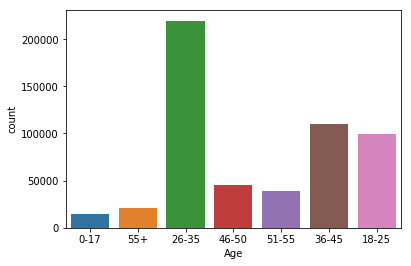

In [0]:
sns.countplot(df_train['Age'])

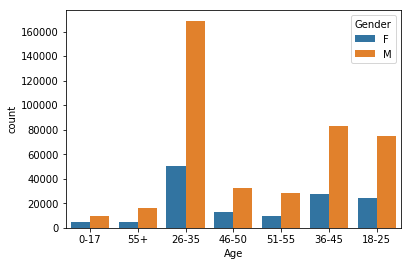

In [0]:
sns.countplot(df_train['Age'],hue=df_train['Gender'])

In [0]:
dfage=df_train['Age'].unique()
dfage

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [0]:
df_train["Product_Category_2"] = df_train["Product_Category_2"].astype(int)
df_train["Product_Category_3"] = df_train["Product_Category_3"].astype(int)

In [0]:
df_train["Product_Category_2"].replace(-1,float('nan'),inplace=True)
df_train["Product_Category_3"].replace(-1,float('nan'),inplace=True)

In [0]:
df_train['Age_Encoded'] = df_train['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})

In [0]:
age=df_train['Age_Encoded'].unique()

In [0]:
df_train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________


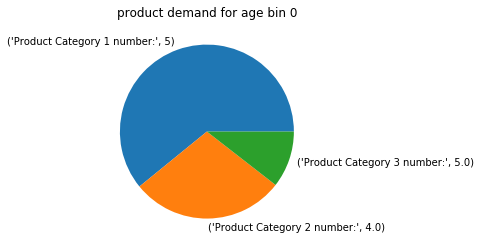

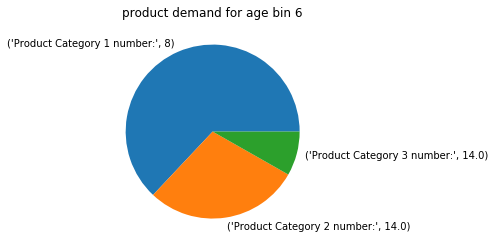

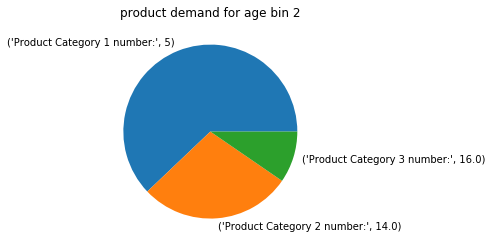

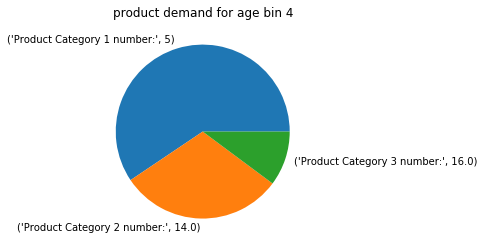

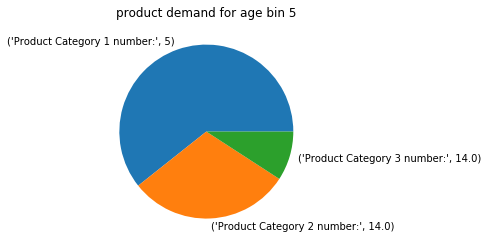

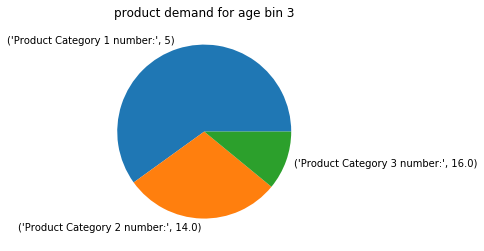

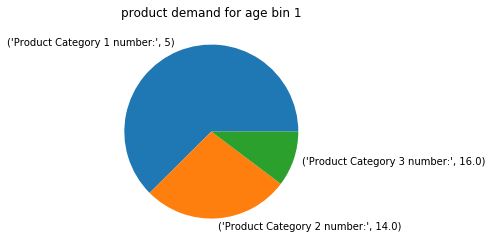

In [0]:
################################## FEMALE & AGE PRODUCT SOLD #######################################
for i in age:
  newdf=df_train[(df_train['Age_Encoded']==i)&(df_train['Gender']=='F')]
  pd1=newdf['Product_Category_1'].mode()
  pd1=np.array(pd1)
  count1=newdf['Product_Category_1'].value_counts()
  count1=pd.DataFrame(count1)
  count1.reset_index()
  x=count1['Product_Category_1'].max()
  l1='Product Category 1 number:',pd1[0]

  newdr2=newdf
  newdr2['Product_Category_2'].dropna(inplace=True)
  pd2=newdr2['Product_Category_2'].mode()
  pd2=np.array(pd2)
  count2=newdf['Product_Category_2'].value_counts()
  count2=pd.DataFrame(count2)
  count2.reset_index()
  y=count2['Product_Category_2'].max()
  l2='Product Category 2 number:',pd2[0]
  l2

  newdr3=newdf
  newdr3['Product_Category_3'].dropna(inplace=True)
  pd3=newdr3['Product_Category_3'].mode()
  pd3=np.array(pd3)
  count3=newdf['Product_Category_3'].value_counts()
  count3=pd.DataFrame(count3)
  count3.reset_index()
  z=count3['Product_Category_3'].max()
  l3='Product Category 3 number:',pd3[0]
  l3
  pltdata=[x,y,z]

  label=[l1,l2,l3]
  plt.figure()
  plt.title('product demand for age bin %i'%i)
  plt.pie(pltdata,labels=label)
  print('________________________________________________________________________________________')
  

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________
________________________________________________________________________________________


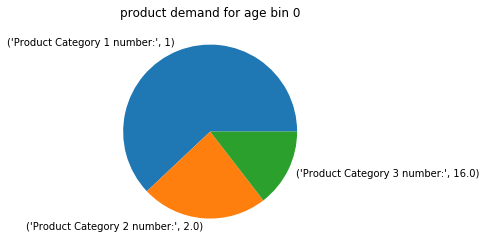

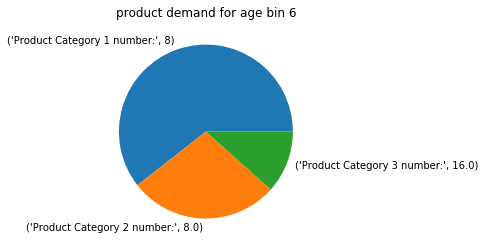

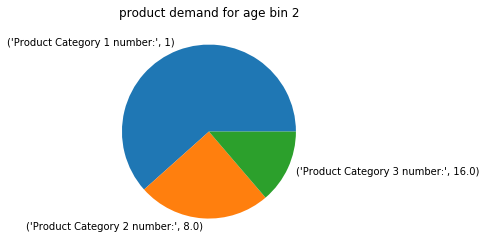

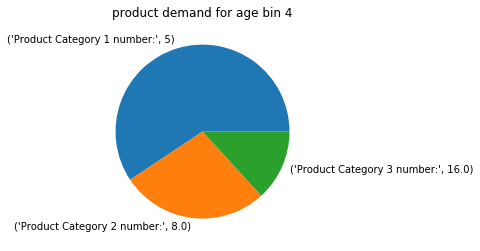

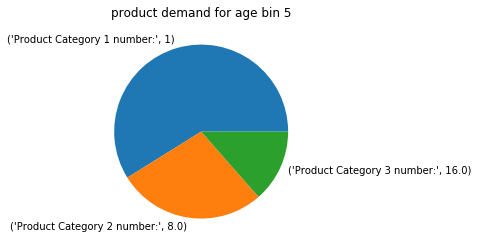

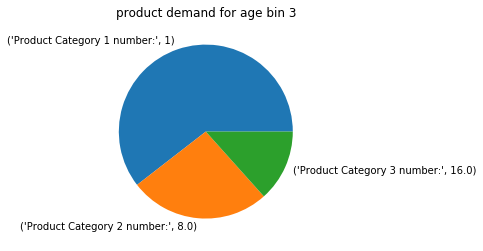

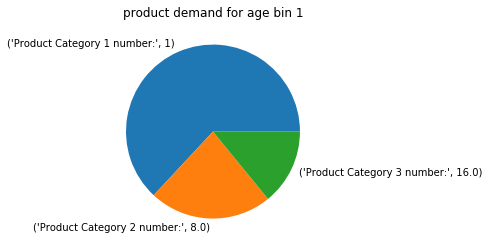

In [0]:
################################# MALE & AGE PRODUCT SOLD #######################################
for i in age:
  newdf=df_train[(df_train['Age_Encoded']==i)&(df_train['Gender']=='M')]
  pd1=newdf['Product_Category_1'].mode()
  pd1=np.array(pd1)
  count1=newdf['Product_Category_1'].value_counts()
  count1=pd.DataFrame(count1)
  count1.reset_index()
  x=count1['Product_Category_1'].max()
  l1='Product Category 1 number:',pd1[0]

  newdr2=newdf
  newdr2['Product_Category_2'].dropna(inplace=True)
  pd2=newdr2['Product_Category_2'].mode()
  pd2=np.array(pd2)
  count2=newdf['Product_Category_2'].value_counts()
  count2=pd.DataFrame(count2)
  count2.reset_index()
  y=count2['Product_Category_2'].max()
  l2='Product Category 2 number:',pd2[0]
  l2

  newdr3=newdf
  newdr3['Product_Category_3'].dropna(inplace=True)
  pd3=newdr3['Product_Category_3'].mode()
  pd3=np.array(pd3)
  count3=newdf['Product_Category_3'].value_counts()
  count3=pd.DataFrame(count3)
  count3.reset_index()
  z=count3['Product_Category_3'].max()
  l3='Product Category 3 number:',pd3[0]
  l3
  pltdata=[x,y,z]

  label=[l1,l2,l3]
  plt.figure()
  plt.title('product demand for age bin %i'%i)
  plt.pie(pltdata,labels=label)
  print('________________________________________________________________________________________')
  

In [0]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [0]:
df_train.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0


In [0]:
df_train['Product_Category_2'].fillna(0,inplace=True)
df_train['Product_Category_3'].fillna(0,inplace=True)
df_train['Product_Category_2']=df_train['Product_Category_2'].astype('int64')
df_train['Product_Category_3']=df_train['Product_Category_3'].astype('int64')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,6


In [0]:
df_train['Age_Encoded'] = df_train['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})

In [0]:
df_train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [0]:
#As Occ number 8 9 18 13 19 Are Considerably less so they can be created into new data entry as others number=100
df_train['Occupation'].replace(8,100,inplace=True)
df_train['Occupation'].replace(9,100,inplace=True)
df_train['Occupation'].replace(18,100,inplace=True)
df_train['Occupation'].replace(13,100,inplace=True)
df_train['Occupation'].replace(19,100,inplace=True)
df_train['Occupation'].value_counts()

4      72308
0      69638
7      59133
1      47426
17     40043
20     33562
12     31179
100    30648
14     27309
2      26588
16     25371
6      20355
3      17650
10     12930
5      12177
15     12165
11     11586
Name: Occupation, dtype: int64

In [0]:
############################Dummy Variable Creation one hot encoding for Gender#########################################
df_trainj=pd.get_dummies(df_train['Gender'])
df_trainj
df_train['F']=df_trainj['F']
df_train['M']=df_trainj['M']

In [0]:
###################Dummy Variables Creation For City Category Stay and Marital St#####################################
dum_city=pd.get_dummies(df_train['City_Category'])
df_train=pd.concat([df_train,dum_city],axis=1)

In [0]:
dum_stay=pd.get_dummies(df_train['Stay_In_Current_City_Years'])
df_train=pd.concat([df_train,dum_stay],axis=1)

In [0]:
df_train.rename(columns={'0':'0 year','1':'1 year','2':'2 years','3':'3 years','4+':'4+ years','F':'Female','M':'Male','A':'City A','B':'City B','C':'City C'},inplace=True)

In [0]:
################################################PRODUCT AND USER ID Feature engg####################################################
df_train['User_ID'].nunique()

5891

In [0]:
df_train['Product_ID'].nunique()

3631

In [0]:
prodhit=df_train['Product_ID'].value_counts()
prodhit=pd.DataFrame(prodhit)
prodhit.reset_index(inplace=True)
prodhit

,index,Product_ID
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00145042,1406
9,P00059442,1406


In [0]:
prodhit.rename(columns={'index':'ProdNum','Product_ID':'Producthits'},inplace=True)

In [0]:
prodhit.head()

,ProdNum,Producthits
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470


In [0]:
userhit=df_train['User_ID'].value_counts()
userhit=pd.DataFrame(userhit)
userhit.reset_index(inplace=True)
userhit
userhit.rename(columns={'index':'Userid','User_ID':'Userfreq'},inplace=True)

In [0]:
userhit.head()

,Userid,Userfreq
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823


In [0]:
userhit_dict=dict(zip(userhit['Userid'],userhit['Userfreq']))

In [0]:
prodhit_dict=dict(zip(prodhit['ProdNum'],prodhit['Producthits']))

In [0]:
df_train['userhit']=df_train['User_ID'].map(userhit_dict)

In [0]:
df_train['producthit']=df_train['Product_ID'].map(prodhit_dict)

In [0]:
occhit=df_train['Occupation'].value_counts()
occhit=pd.DataFrame(occhit)
occhit.reset_index(inplace=True)
occhit.rename(columns={'index':'OccNum','Occupation':'Occhits'},inplace=True)
occhit_dict=dict(zip(occhit['OccNum'],occhit['Occhits']))
df_train['occhit']=df_train['Occupation'].map(occhit_dict)

In [0]:
agehit=df_train['Age_Encoded'].value_counts()
agehit=pd.DataFrame(agehit)
agehit.reset_index(inplace=True)
agehit.rename(columns={'index':'AgeNum','Age_Encoded':'Agehits'},inplace=True)
agehit_dict=dict(zip(agehit['AgeNum'],agehit['Agehits']))
df_train['agehit']=df_train['Age_Encoded'].map(agehit_dict)

In [0]:
prodc1hit=df_train['Product_Category_1'].value_counts()
prodc1hit=pd.DataFrame(prodc1hit)
prodc1hit.reset_index(inplace=True)
prodc1hit.rename(columns={'index':'Prodc1Num','Product_Category_1':'Prodc1hits'},inplace=True)
prodc1hit_dict=dict(zip(prodc1hit['Prodc1Num'],prodc1hit['Prodc1hits']))
df_train['prodc1hit']=df_train['Product_Category_1'].map(prodc1hit_dict)

In [0]:
prodc2hit=df_train['Product_Category_2'].value_counts()
prodc2hit=pd.DataFrame(prodc2hit)
prodc2hit.reset_index(inplace=True)
prodc2hit.rename(columns={'index':'Prodc2Num','Product_Category_2':'Prodc2hits'},inplace=True)
prodc2hit_dict=dict(zip(prodc2hit['Prodc2Num'],prodc2hit['Prodc2hits']))
df_train['prodc2hit']=df_train['Product_Category_2'].map(prodc2hit_dict)

In [0]:
prodc3hit=df_train['Product_Category_3'].value_counts()
prodc3hit=pd.DataFrame(prodc3hit)
prodc3hit.reset_index(inplace=True)
prodc3hit.rename(columns={'index':'Prodc3Num','Product_Category_3':'Prodc3hits'},inplace=True)
prodc3hit_dict=dict(zip(prodc3hit['Prodc3Num'],prodc3hit['Prodc3hits']))
df_train['prodc3hit']=df_train['Product_Category_3'].map(prodc3hit_dict)

In [0]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Female,Male,City A,City B,City C,0 year,1 year,2 years,3 years,4+ years,userhit,producthit,Occmax,pc1max,pc2max,pc3max,index,PC1Count,occhit,agehit,prodc1hit,prodc2hit,prodc3hit
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,0,1,0,1,0,0,0,0,1,0,0,35,227,0,0,0,0,2,11,12930,15102,20213,173638,383247
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,0,1,0,1,0,0,0,0,1,0,0,35,581,0,0,0,0,0,4,12930,15102,140378,16466,18428
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,0,1,0,1,0,0,0,0,1,0,0,35,102,0,0,0,0,7,3,12930,15102,3947,173638,383247
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,0,1,0,1,0,0,0,0,1,0,0,35,341,0,0,0,0,7,3,12930,15102,3947,55108,383247
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,6,0,1,0,0,1,0,0,0,0,1,77,203,0,0,0,0,15,25,25371,21504,113925,173638,383247


In [0]:
df_train['Occmax']=np.where(df_train['Occupation']==4,1,0)

In [0]:
df_train['pc1max'] = np.where(df_train['Product_Category_1']==10,1,0)

In [0]:
df_train['pc2max1'] = np.where(df_train['Product_Category_2']==15,1,0)
df_train['pc2max2'] = np.where(df_train['Product_Category_2']==13,1,0)
df_train['pc2max3'] = np.where(df_train['Product_Category_2']==16,1,0)

In [0]:
df_train['pc2xmax']=df_train['pc2max1']|df_train['pc2max2']

In [0]:
df_train['pc2max']=df_train['pc2xmax']|df_train['pc2max3']

In [0]:
df_train.drop('pc2max1',inplace=True,axis=1)
df_train.drop('pc2max2',inplace=True,axis=1)
df_train.drop('pc2max3',inplace=True,axis=1)
df_train.drop('pc2xmax',inplace=True,axis=1)

In [0]:
df_train['pc3max'] = np.where(df_train['Product_Category_3']==16,1,0)

In [0]:
count_df=df_train.groupby(['User_ID','Product_Category_1']).Product_ID.count()
lol=pd.DataFrame(count_df)
lol.reset_index(inplace=True)

In [0]:
lol.head()

,User_ID,Product_Category_1,Product_ID
0,1000001,1,4
1,1000001,2,1
2,1000001,3,11
3,1000001,4,2
4,1000001,5,2


In [0]:
lol.rename(columns={'Product_ID':'Count'},inplace=True)

In [0]:
lol['Product_Category_1']=lol['Product_Category_1'].astype('int64')
lol['Count']=lol['Count'].astype('int64')

In [0]:
df_train=df_train.merge(lol.reset_index(), how='left')

In [0]:
df_train.rename(columns={'Count':'PC1Count'},inplace=True)

In [0]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Female,Male,City A,City B,City C,0 year,1 year,2 years,3 years,4+ years,userhit,producthit,Occmax,pc1max,pc2max,pc3max,index,PC1Count
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,0,1,0,1,0,0,0,0,1,0,0,35,227,0,0,0,0,2,11
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,0,1,0,1,0,0,0,0,1,0,0,35,581,0,0,0,0,0,4
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,0,1,0,1,0,0,0,0,1,0,0,35,102,0,0,0,0,7,3
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,0,1,0,1,0,0,0,0,1,0,0,35,341,0,0,0,0,7,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,6,0,1,0,0,1,0,0,0,0,1,77,203,0,0,0,0,15,25


In [0]:
df_train.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
Age_Encoded                    int64
Female                         uint8
Male                           uint8
City A                         uint8
City B                         uint8
City C                         uint8
0 year                         uint8
1 year                         uint8
2 years                        uint8
3 years                        uint8
4+ years                       uint8
userhit                        int64
producthit                     int64
Occmax                         int64
pc1max                         int64
p

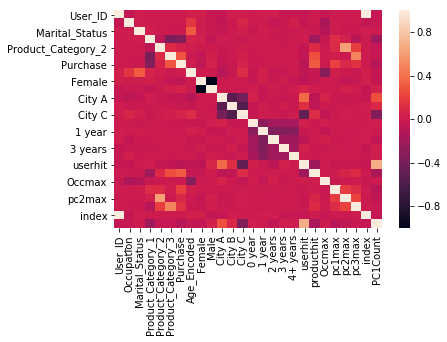

In [0]:
sns.heatmap(df_train.corr())

In [0]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Female,Male,City A,City B,City C,0 year,1 year,2 years,3 years,4+ years,userhit,producthit,Occmax,pc1max,pc2max,pc3max,index,PC1Count,occhit,agehit,prodc1hit,prodc2hit,prodc3hit
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,0,1,0,1,0,0,0,0,1,0,0,35,227,0,0,0,0,2,11,12930,15102,20213,173638,383247
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,0,1,0,1,0,0,0,0,1,0,0,35,581,0,0,0,0,0,4,12930,15102,140378,16466,18428
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,0,1,0,1,0,0,0,0,1,0,0,35,102,0,0,0,0,7,3,12930,15102,3947,173638,383247
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,0,1,0,1,0,0,0,0,1,0,0,35,341,0,0,0,0,7,3,12930,15102,3947,55108,383247
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,6,0,1,0,0,1,0,0,0,0,1,77,203,0,0,0,0,15,25,25371,21504,113925,173638,383247


In [0]:
#df_train is total dataset
#choose the features to be used in model building for regression
model_data=df_train.filter(['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase','Age_Encoded','Female','City A','City B','0 year','1 year','2 years','3 years','userhit','producthit'],axis=1)
data_y_pred=model_data['Purchase']
data_x=model_data.drop(['Purchase'],axis=1)
data_x.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Age_Encoded,Female,City A,City B,0 year,1 year,2 years,3 years,userhit,producthit
0,10,3,0,0,0,1,1,0,0,0,1,0,35,227
1,10,1,6,14,0,1,1,0,0,0,1,0,35,581
2,10,12,0,0,0,1,1,0,0,0,1,0,35,102
3,10,12,14,0,0,1,1,0,0,0,1,0,35,341
4,16,8,0,0,6,0,0,0,0,0,0,0,77,203


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_x.columns
#   vif=variance_inflation_factor(x[i])
vif = [variance_inflation_factor(data_x[variables].values, data_x.columns.get_loc(var)) for var in data_x.columns]

#   max_vif = max(vif)
#   print('VIF of',i,':',vif)
vif

[1.3632894126924566,
 2.892531279441006,
 2.109635906464649,
 1.6320696409524067,
 3.8286581359965117,
 1.3238905301487727,
 2.503554036636582,
 2.6460087536591668,
 1.6074421031646016,
 2.601171197733802,
 1.800059955054798,
 1.7826482846350422,
 3.5142503475110964,
 2.5251770207735458]

In [0]:
vif=pd.DataFrame(vif)
variables=pd.DataFrame(variables)
vif=vif.rename(columns={'0':'VIF'})
variables=variables.rename(columns={'0':'Columns'})
vif
# variables
df_vif=pd.concat([variables,vif],axis=1)
# variables
# df_vif.set_index('Columns',inplace=True)
df_vif

,0,0
0,Occupation,1.363289
1,Product_Category_1,2.892531
2,Product_Category_2,2.109636
3,Product_Category_3,1.632070
4,Age_Encoded,3.828658
5,Female,1.323891
6,City A,2.503554
7,City B,2.646009
8,0 year,1.607442
9,1 year,2.601171


In [0]:
##################################### DIVISION OF TEST AND TRAIN #######################################################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x,data_y_pred, test_size = 0.3,)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
model = LinearRegression()
l=model.fit(x_train, y_train)

In [0]:
y_pred=model.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [0]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4504.4354711866035
R2 Score: 0.1975206195216429


In [0]:
y_pred

array([ 7635.95937742,  8464.63982322,  7639.32820528, ...,
        7459.10497604, 13676.95853527, 12650.96244731])

In [0]:
#####################################DROP DUPLICATE USERID###############################################

In [0]:
userids=df_train['User_ID'].nunique()
# products=df_train['Product_ID'].nunique()
userids

5891

In [0]:
new_train=df_train.drop_duplicates(subset='User_ID', keep="last")

In [0]:
new_train.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
Age_Encoded                    int64
Female                         uint8
Male                           uint8
City A                         uint8
City B                         uint8
City C                         uint8
0 year                         uint8
1 year                         uint8
2 years                        uint8
3 years                        uint8
4+ years                       uint8
userhit                        int64
producthit                     int64
Occmax                         int64
pc1max                         int64
p

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
new_train['Product_ID'] = labelencoder.fit_transform(new_train['Product_ID'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
new_train.drop('User_ID',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
new_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Female,Male,City A,City B,City C,0 year,1 year,2 years,3 years,4+ years,userhit,producthit,Occmax,pc1max,pc2max,pc3max,index,PC1Count
306410,162,F,55+,6,C,1,1,3,0,0,13532,6,1,0,0,0,1,0,1,0,0,0,10,227,0,0,0,0,48830,3
311766,673,M,36-45,0,C,0,0,1,6,14,15381,3,0,1,0,0,1,1,0,0,0,0,13,581,0,0,0,0,104,4
311961,183,M,18-25,4,C,4+,1,1,6,8,15848,1,0,1,0,0,1,0,0,0,0,1,14,1203,1,0,0,0,395,2
339200,958,M,36-45,17,C,3,0,1,17,0,8192,3,0,1,0,0,1,0,0,0,1,0,8,114,0,0,0,0,39202,5
353471,253,F,46-50,11,A,1,0,8,0,0,9989,4,1,0,1,0,0,0,1,0,0,0,18,249,0,0,0,0,4066,9


In [0]:
new_train.reset_index(inplace=True)
new_train.drop('index',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Female,Male,City A,City B,City C,0 year,1 year,2 years,3 years,4+ years,userhit,producthit,Occmax,pc1max,pc2max,pc3max,index,PC1Count,occhit,agehit,prodc1hit,prodc2hit,prodc3hit
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,0,1,0,1,0,0,0,0,1,0,0,35,227,0,0,0,0,2,11,12930,15102,20213,173638,383247
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,0,1,0,1,0,0,0,0,1,0,0,35,581,0,0,0,0,0,4,12930,15102,140378,16466,18428


In [0]:
features=['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Age_Encoded','Female','City A','City B','0 year','1 year','2 years','3 years','userhit','producthit','occhit','agehit']
model_data=df_train.filter(features,axis=1)
data_y_pred=df_train['Purchase']
data_x=model_data

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_x.columns
#   vif=variance_inflation_factor(x[i])
vif = [variance_inflation_factor(data_x[variables].values, data_x.columns.get_loc(var)) for var in data_x.columns]

#   max_vif = max(vif)
#   print('VIF of',i,':',vif)
vif

[1.4218578334550243,
 3.134870518846247,
 2.1541535614902294,
 1.6589709105953823,
 4.12372510078367,
 1.328374704601366,
 2.598101605430525,
 2.743127137689657,
 1.7105487930019379,
 2.8643182624942707,
 1.9603607469222144,
 1.9187030085171257,
 3.6312609265041416,
 2.7037258297584503,
 4.871594067874858,
 4.3299543353290435]

In [0]:
vif=pd.DataFrame(vif)
variables=pd.DataFrame(variables)
vif=vif.rename(columns={'0':'VIF'})
variables=variables.rename(columns={'0':'Columns'})
vif
# variables
df_vif=pd.concat([variables,vif],axis=1)
# variables
# df_vif.set_index('Columns',inplace=True)
df_vif

,0,0
0,Occupation,1.421858
1,Product_Category_1,3.134871
2,Product_Category_2,2.154154
3,Product_Category_3,1.658971
4,Age_Encoded,4.123725
5,Female,1.328375
6,City A,2.598102
7,City B,2.743127
8,0 year,1.710549
9,1 year,2.864318


In [0]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Female,Male,City A,City B,City C,0 year,1 year,2 years,3 years,4+ years,userhit,producthit,Occmax,pc1max,pc2max,pc3max,index,PC1Count
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,0,1,0,1,0,0,0,0,1,0,0,35,227,0,0,0,0,2,11
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,0,1,0,1,0,0,0,0,1,0,0,35,581,0,0,0,0,0,4
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,0,1,0,1,0,0,0,0,1,0,0,35,102,0,0,0,0,7,3
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,0,1,0,1,0,0,0,0,1,0,0,35,341,0,0,0,0,7,3
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,6,0,1,0,0,1,0,0,0,0,1,77,203,0,0,0,0,15,25


In [0]:
##################################### DIVISION OF TEST AND TRAIN #######################################################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x,data_y_pred, test_size = 0.3,random_state=75)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_trainsc = sc.fit_transform(x_train)
x_testsc = sc.transform(x_test)

In [0]:
############################################LINEAR REGRESSION##########################################################
model = LinearRegression()
l=model.fit(x_train, y_train)

In [0]:
y_pred=model.predict(x_test)

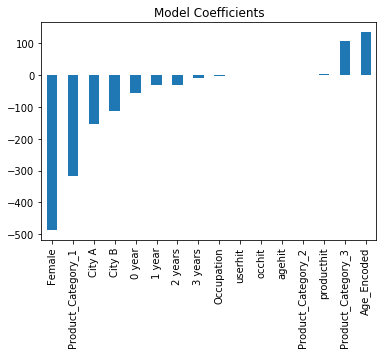

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictors=data_x.columns
coef1 = pd.Series(l.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [0]:
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4502.606993630691
R2 Score: 0.19759422074391308


In [0]:
!pip install scipy==1.2 --upgrade
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

Requirement already up-to-date: scipy==1.2 in /usr/local/lib/python3.6/dist-packages (1.2.0)


In [0]:
################################################## STATISTICAL OLS MODEL ####################################################
est=sm.OLS(y_train,x_train)
est2=est.fit()
print(est2.summary())
ols_y=est2.predict(x_test)

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 9.373e+04
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        06:43:42   Log-Likelihood:            -3.8071e+06
No. Observations:              385047   AIC:                         7.614e+06
Df Residuals:                  385031   BIC:                         7.614e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Occupation            14.0335      0

In [0]:
mse = mean_squared_error(y_test, ols_y)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, ols_y)
print("R2 Score:", r2)
# coef1 = pd.Series(est2.coef_, predictors).sort_values()
# coef1.plot(kind='bar', title='Model Coefficients')

RMSE Error: 4760.8224789812675
R2 Score: 0.10292254862611894


In [0]:
pred_val = est2.fittedvalues.copy()
true_val = y_train.copy()
residual = true_val - pred_val

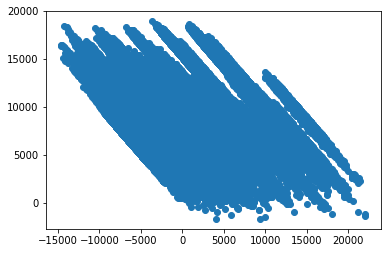

In [0]:
fig, ax = plt.subplots()
ax.scatter(residual, pred_val)

In [0]:
import statsmodels
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual,x_train[features])
pval, f_pval

(0.0, 0.0)

0.9777836089572542

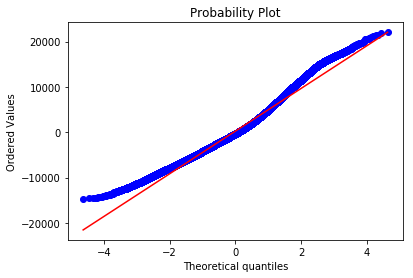

In [0]:
 import scipy as sp
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [0]:
###########################REGULARISATION################################
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

lm=LinearRegression()
lm_lasso=Lasso()
lm_ridge=Ridge()
lm_elastic=ElasticNet()

In [0]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha': sp_rand()}

In [0]:
from sklearn.model_selection import GridSearchCV
alphas = np.array([25,0.25,0.025,0.0025,0.00025,0])
grid = RandomizedSearchCV(estimator=lm_lasso, param_distributions=param_grid, n_iter=100)
grid2 = RandomizedSearchCV(estimator=lm_ridge, param_distributions=param_grid, n_iter=100)
grid3 = RandomizedSearchCV(estimator=lm_elastic, param_distributions=param_grid, n_iter=100)

In [0]:
grid.fit(x_trainsc,y_train)
grid2.fit(x_trainsc,y_train)
grid3.fit(x_trainsc,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe1a0a75978>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [0]:
print(grid.best_score_,'-Lasso reg')
print(grid2.best_score_,'-Ridge reg')
print(grid3.best_score_,'-Elastic net')
# 0.19604934823969924

0.19611386390146976 -Lasso reg
0.1961099335233613 -Ridge reg
0.19611001482939824 -Elastic net


In [0]:
lm.fit(x_trainsc,y_train)
lm_lasso.fit(x_trainsc,y_train)
lm_ridge.fit(x_trainsc,y_train)
lm_elastic.fit(x_trainsc,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#LINEAR REGRESSION
y_pred=lm.predict(x_testsc)
mse = mean_squared_error(y_pred, y_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4502.606993630693
R2 Score: 0.19759422074391253


In [0]:
# LASSO REGRESSION
y_predl=lm_lasso.predict(x_testsc)
mse = mean_squared_error(y_predl, y_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, y_predl)
print("R2 Score:", r2)

RMSE Error: 4502.62759121139
R2 Score: 0.19758687937229524


In [0]:
# RIDGE REGRESSION
y_predr=lm_ridge.predict(x_testsc)
mse = mean_squared_error(y_predr, y_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, y_predr)
print("R2 Score:", r2)

RMSE Error: 4502.607002937525
R2 Score: 0.1975942174267873


In [0]:
# ELastic Net
y_preden=lm_elastic.predict(x_testsc)
mse = mean_squared_error(y_preden, y_test)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test, y_preden)
print("R2 Score:", r2)

RMSE Error: 4537.721529340627
R2 Score: 0.1850299551525858


In [0]:
import xgboost

In [0]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=8)
xgb.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[06:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [0]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(x_test)

In [0]:
mse = mean_squared_error(y_test,predictions)
print("RMSE Error:", np.sqrt(mse))
r2 = r2_score(y_test,predictions)
print("R2 Score:", r2)
# coef1 = pd.Series(est2.coef_, predictors).sort_values()
# coef1.plot(kind='bar', title='Model Coefficients')

RMSE Error: 2646.825052651482
R2 Score: 0.7227213453682688
